# Get the Class names 

This file contains a subset of the quick draw classes. I choose around 100 classes from the dataset. 

In [1]:
!wget 'https://raw.githubusercontent.com/googlecreativelab/quickdraw-dataset/master/categories.txt'

--2019-04-21 19:34:59--  https://raw.githubusercontent.com/googlecreativelab/quickdraw-dataset/master/categories.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2791 (2.7K) [text/plain]
Saving to: ‘categories.txt’

categories.txt      100%[===================>]   2.73K  --.-KB/s    in 0s      

2019-04-21 19:35:00 (71.2 MB/s) - ‘categories.txt’ saved [2791/2791]



Read the classes names 

In [2]:
f = open("categories.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [3]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]
print(classes)

['aircraft_carrier', 'airplane', 'alarm_clock', 'ambulance', 'angel', 'animal_migration', 'ant', 'anvil', 'apple', 'arm', 'asparagus', 'axe', 'backpack', 'banana', 'bandage', 'barn', 'baseball', 'baseball_bat', 'basket', 'basketball', 'bat', 'bathtub', 'beach', 'bear', 'beard', 'bed', 'bee', 'belt', 'bench', 'bicycle', 'binoculars', 'bird', 'birthday_cake', 'blackberry', 'blueberry', 'book', 'boomerang', 'bottlecap', 'bowtie', 'bracelet', 'brain', 'bread', 'bridge', 'broccoli', 'broom', 'bucket', 'bulldozer', 'bus', 'bush', 'butterfly', 'cactus', 'cake', 'calculator', 'calendar', 'camel', 'camera', 'camouflage', 'campfire', 'candle', 'cannon', 'canoe', 'car', 'carrot', 'castle', 'cat', 'ceiling_fan', 'cello', 'cell_phone', 'chair', 'chandelier', 'church', 'circle', 'clarinet', 'clock', 'cloud', 'coffee_cup', 'compass', 'computer', 'cookie', 'cooler', 'couch', 'cow', 'crab', 'crayon', 'crocodile', 'crown', 'cruise_ship', 'cup', 'diamond', 'dishwasher', 'diving_board', 'dog', 'dolphin', 

# Download the Dataset 

Loop over the classes and download the currospondent data

In [6]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [7]:
import urllib
def download():
  
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.urlretrieve(path, 'data/'+c+'.npy')

In [8]:
download() 

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/aircraft%20carrier.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/alarm%20clock.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ambulance.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/angel.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/animal%20migration.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ant.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/arm.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/asparagus.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/axe.npy
https://storage.googleapis.com/quickd

# Imports 

In [4]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf


# Load the Data 

Each class contains different number samples of arrays stored as .npy format. We will load 50000 images per class.  

In [5]:
def load_data(root, vfold_ratio=0.1, max_items_per_class=50000):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        print(idx)
        print(file)
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [6]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

0
data/flashlight.npy
1
data/belt.npy
2
data/mushroom.npy
3
data/pond.npy
4
data/strawberry.npy
5
data/pineapple.npy
6
data/sun.npy
7
data/cow.npy
8
data/ear.npy
9
data/bush.npy
10
data/pliers.npy
11
data/watermelon.npy
12
data/apple.npy
13
data/baseball.npy
14
data/feather.npy
15
data/shoe.npy
16
data/leaf.npy
17
data/lollipop.npy
18
data/crown.npy
19
data/ocean.npy
20
data/horse.npy
21
data/mountain.npy
22
data/mosquito.npy
23
data/mug.npy
24
data/hospital.npy
25
data/saw.npy
26
data/castle.npy
27
data/angel.npy
28
data/underwear.npy
29
data/traffic_light.npy
30
data/cruise_ship.npy
31
data/marker.npy
32
data/blueberry.npy
33
data/flamingo.npy
34
data/face.npy
35
data/hockey_stick.npy
36
data/bucket.npy
37
data/campfire.npy
38
data/asparagus.npy
39
data/skateboard.npy
40
data/door.npy
41
data/suitcase.npy
42
data/skull.npy
43
data/cloud.npy
44
data/paint_can.npy
45
data/hockey_puck.npy
46
data/steak.npy
47
data/house_plant.npy
48
data/sleeping_bag.npy
49
data/bench.npy
50
data/snowma

In [7]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

15525000
15525000
1725000
1725000


Show some random data 

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   4.
   67.  77.  67.  15.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  27. 142. 232.
  255. 255. 255. 233.  97.   1.   0.   0.   0.   0.   0.  

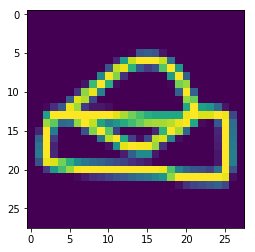

In [8]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
print(x_train[idx].reshape(28,28))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

# Preprocess the Data 

In [9]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# The Model 

In [10]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),padding='same',input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.Convolution2D(16, (3, 3),padding='same',input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))

model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dense(345, activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['top_k_categorical_accuracy'])
print(model.summary())


15525000
15525000
1725000
1725000
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_____________________________________________________

# Training 

In [11]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5)

Train on 13972500 samples, validate on 1552500 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 366s - loss: 1.5536 - top_k_categorical_accuracy: 0.8542 - val_loss: 1.3215 - val_top_k_categorical_accuracy: 0.8851
Epoch 2/5
 - 364s - loss: 1.3474 - top_k_categorical_accuracy: 0.8828 - val_loss: 1.2708 - val_top_k_categorical_accuracy: 0.8915
Epoch 3/5
 - 363s - loss: 1.3127 - top_k_categorical_accuracy: 0.8871 - val_loss: 1.2680 - val_top_k_categorical_accuracy: 0.8919
Epoch 4/5
 - 361s - loss: 1.2945 - top_k_categorical_accuracy: 0.8893 - val_loss: 1.2411 - val_top_k_categorical_accuracy: 0.8960
Epoch 5/5
 - 361s - loss: 1.2831 - top_k_categorical_accuracy: 0.8907 - val_loss: 1.2276 - val_top_k_categorical_accuracy: 0.8968


# Testing 

In [12]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

15525000
15525000
1725000
1725000
Test accuarcy: 89.67%


# Inference 

['lighter', 'candle', 'lipstick', 'marker', 'toothpaste']


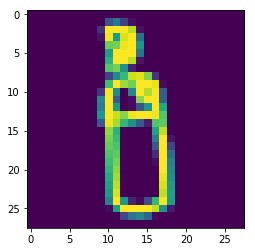

In [13]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

# Store the classes 

In [14]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

# Install TensorFlowJS

In [15]:
!pip install tensorflowjs 

    100% |████████████████████████████████| 81kB 9.8MB/s 
    100% |████████████████████████████████| 13.9MB 3.0MB/s 
    100% |████████████████████████████████| 86.8MB 405kB/s 
    100% |████████████████████████████████| 2.8MB 23.4MB/s 
    100% |████████████████████████████████| 3.1MB 15.4MB/s 
    100% |████████████████████████████████| 430kB 22.4MB/s 
    100% |████████████████████████████████| 61kB 38.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/89/67/41/63cbf0f6ac0a6156588b9587be4db5565f8c6d8ccef98202fc
Successfully built wrapt
  Found existing installation: six 1.12.0
    Uninstalling six-1.12.0:
      Successfully uninstalled six-1.12.0
  Found existing installation: numpy 1.16.2
    Uninstalling numpy-1.16.2:
      Successfully uninstalled numpy-1.16.2
  Found existing installation: h5py 2.9.0
    Uninstalling h5py-2.9.0:
      Successfully uninstalled h5py-2.9.0


# Save and Convert 

In [16]:
model.save('keras.h5')

In [17]:
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/
!cp class_names.txt model/class_names.txt

# Download
Download all the files in the model folder on the left sidebar.